<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/project%20files/Traditional/Supervised/Jack_LinearRegression_TF_Keras_PROJECT24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINEAR REGRESSION**


---
## **Group 3**

**Ghazi Al Barakeh, Mohamed Ali, Maher Alqarra, Jack Ivanisevic, Muhammad Usman Raza**

**Coded by:** Jack Ivanisevic

---

In [1]:
# Import needed lirbraies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split



In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)

# x: variable will hold the image data (the actual pictures of clothing).
# y: variable will hold the labels (the categories for each image, like T-shirt, Trouser, etc.).
# fashion_mnist['data']: access the image data from the loaded dataset.
# fashion_mnist['target']: access the labels from the dataset.
# .astype(int): convert the labels to integer type (from string) for easier processing later on.
x, y = fashion_mnist['data'], fashion_mnist['target'].astype(int)

# Flatten the images
# x.values: convert the DataFrame x into a NumPy array, making it easier to manipulate.
# .reshape(-1, 28 * 28): reshape each 28x28 image into a 1D array (a single line of 784 pixels).
# -1: use NumPy to automatically calculate how many images there are based on the total size.
# 28 * 28: new shape for each image, indicating that each image will have 784 pixel values.
x_flat = x.values.reshape(-1, 28 * 28)

# Split the data into training and test sets
# train_test_split(...): splits the data into two parts: training data and test data.
# x_flat: the flattened image data that we are splitting.
# y: labels for the images that we are also splitting.
# test_size=0.2: 20% of the data will be set aside for testing, with 80% will be used for training.
# random_state=42: seed for random number generation, ensuring that the split is the same each time you run the code.
x_train_flat, x_test_flat, y_train, y_test = train_test_split(x_flat, y, test_size=0.2, random_state=42)



In [3]:
# Create and train the Linear Regression model
# LinearRegression(): initialize a new linear regression model.
# Linear regression is a simple model that predicts outputs based on a linear relationship with input features.
lin_reg = LinearRegression()

# lin_reg.fit(...): train the model using the training data.
# x_train_flat: the input data (flattened images).
# y_train: the true labels corresponding to the training data.
lin_reg.fit(x_train_flat, y_train)

# Make predictions on the test set
# lin_reg.predict(...): use the trained model to make predictions on the test data.
# x_test_flat: the input data for which we want to predict labels (the flattened test images).
# y_pred: variable that will hold the predicted values, which will be continuous numbers.
y_pred = lin_reg.predict(x_test_flat)

# Since y_pred will be continuous values, convert them to integers and clip to valid class range
# np.round(y_pred): round the continuous predictions to the nearest whole number.
# .astype(int): convert the rounded predictions from float to integer type.
# np.clip(..., 0, 9): all predicted class labels are within the valid range of class indices (0 to 9).
# If a predicted value is less than 0, it will be set to 0; if it's more than 9, it will be set to 9.
# y_pred_classes: variable holds the final predicted class labels after rounding and clipping.
y_pred_classes = np.clip(np.round(y_pred).astype(int), 0, 9)

# Calculate accuracy
# accuracy_score(...): function from the sklearn.metrics module. It calculates the accuracy of the model's predictions.
# Accuracy is a measure of how often the classifier is correct.
# Parameters: y_test: an array of true labels for the test dataset. It contains the actual classes that the model is supposed to predict.
# y_pred_classes: an array of predicted class labels produced by the model. It contains the classes that the model predicted for the test dataset.
# Assignment: The result of the accuracy_score function (a value between 0 and 1, representing the fraction of correct predictions) is stored in the variable accuracy.
accuracy = accuracy_score(y_test, y_pred_classes)

# mean_squared_error(...): function from the sklearn.metrics module. It calculates the Mean Squared Error (MSE) between two sets of values.
# Mean Squared Error is a common measure used to evaluate the accuracy of a model's predictions.
# It quantifies the average of the squares of the differences between predicted and actual values.
# Parameters: y_test: This is the array of true labels for the test dataset. It contains the actual class labels that the model is supposed to predict.
# y_pred_classes: an array of predicted class labels produced by the model. It contains the classes that the model predicted for the test dataset.
# Assignment:The result of the mean_squared_error function (a single numerical value that indicates how far the predictions deviate from the actual values) is stored in the variable mse.
mse = mean_squared_error(y_test, y_pred_classes)

# print(...): output the results.
# accuracy * 100: convert the accuracy from a fraction to a percentage.
# :.2f: format the output to display two decimal places.
print(f"Accuracy: {accuracy * 100:.2f}%")

# f"Mean Squared Error: {mse:.2f}": formatted string (f-string), which allows you to embed expressions inside string literals.
# Mean Squared Error:: static part of the string that describes what the output will show.
# {mse:.2f}: placeholder for the variable mse, which holds the mean squared error value.
# mse: variable contains the mean squared error calculated earlier in the code.
# :.2f: specify how the number should be formatted:
# : indicates the start of a format specification.
# .2f means that the number will be displayed as a floating-point number with two decimal places.
print(f"Mean Squared Error: {mse:.2f}")


Accuracy: 39.13%
Mean Squared Error: 1.97


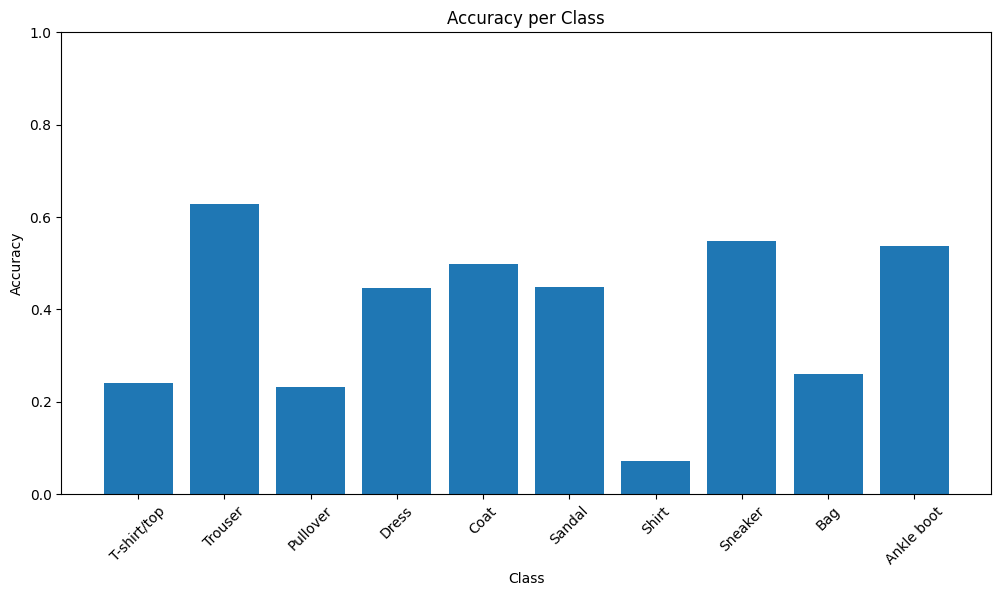

In [4]:
# Define label names for Fashion MNIST
# Create a list called label_names, where each item corresponds to a clothing item in the Fashion MNIST dataset.
# These names will be used to describe the predicted and true labels for the images.
label_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
# Calculate accuracy per class
accuracies_per_class = []
for i in range(10):
    class_accuracy = np.mean(y_test[y_test == i] == y_pred_classes[y_test == i])
    accuracies_per_class.append(class_accuracy)

# Visualize accuracy per class
plt.figure(figsize=(12, 6))
plt.bar(label_names, accuracies_per_class)
plt.title('Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to 1
plt.show()

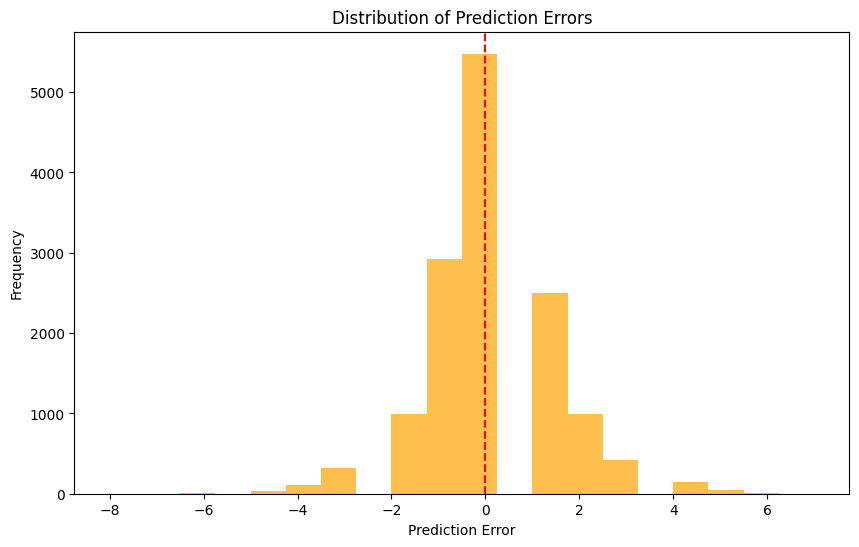

In [5]:
# Calculate prediction errors
# Calculate prediction errors: compute the difference between the true labels (y_test) and the predicted labels (y_pred_classes).
# The result, stored in the variable errors, indicates how far off each prediction is from the actual value.
# Positive values mean under-predictions, while negative values indicate over-predictions.
errors = y_test - y_pred_classes

# Visualize the errors
# Create a new figure
plt.figure(figsize=(10, 6))

# Create a histogram: generate a histogram to visualize the distribution of the prediction errors:
# errors: data being plotted (the differences between true and predicted labels).
# bins=20: specify that the range of errors should be divided into 20 intervals (or bins) for the histogram.
# color='orange': set the color of the bars in the histogram to orange.
# alpha=0.7: set the transparency of the bars to 70%, allowing for a slightly see-through effect.
plt.hist(errors, bins=20, color='orange', alpha=0.7)

# Set title
plt.title('Distribution of Prediction Errors')

# Set x-axis label
plt.xlabel('Prediction Error')

# Set y-axis label
plt.ylabel('Frequency')

# Add a vertical line at zero: draw a dashed red line at zero on the x-axis.
# helps to visualize the point of no error, making it easier to see how many predictions are correct (errors of zero) versus incorrect (positive or negative errors).
plt.axvline(0, color='red', linestyle='--')  # Add a line at zero error

#Display the figure
plt.show()

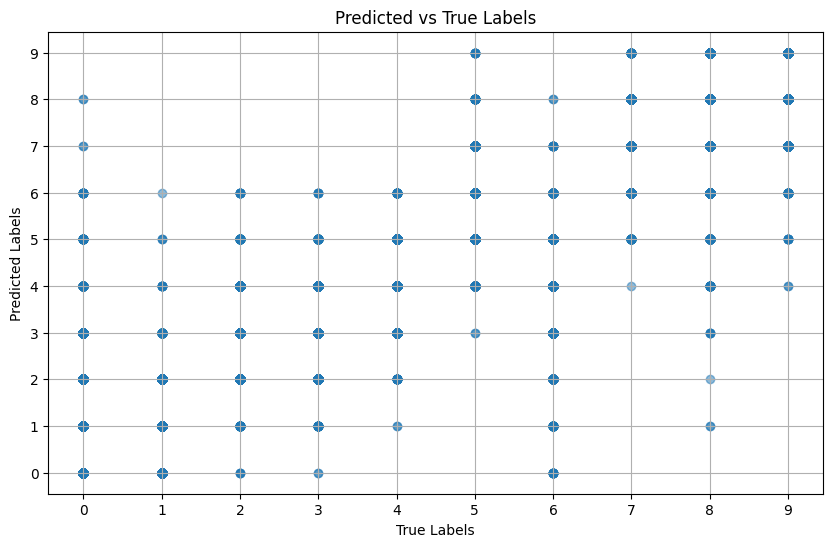

In [6]:
#  Create a new figure of size 10 X 6
plt.figure(figsize=(10, 6))

# Create a scatter plot:
# y_test contains the true labels (the actual classes for the test data).
# y_pred_classes contains the predicted labels (the classes predicted by the model).
# alpha=0.5 sets the transparency of the points to 50%.
plt.scatter(y_test, y_pred_classes, alpha=0.5)

# Set Title
plt.title('Predicted vs True Labels')

# Set x-axis lable
plt.xlabel('True Labels')

# Set y-axis label
plt.ylabel('Predicted Labels')

# Set x-tick marks: configure the marks along the x-axis. ticks should be positioned at integer values from 0 to 9, corresponding to the class labels.
plt.xticks(range(10))

# Set y-tick marks: tick marks on the y-axis to be integers from 0 to 9, which represent the predicted classes
plt.yticks(range(10))

# Add a grid: making it easier to see where points fall relative to the axes. The grid lines improve readability.
plt.grid()

# Display the figure
plt.show()

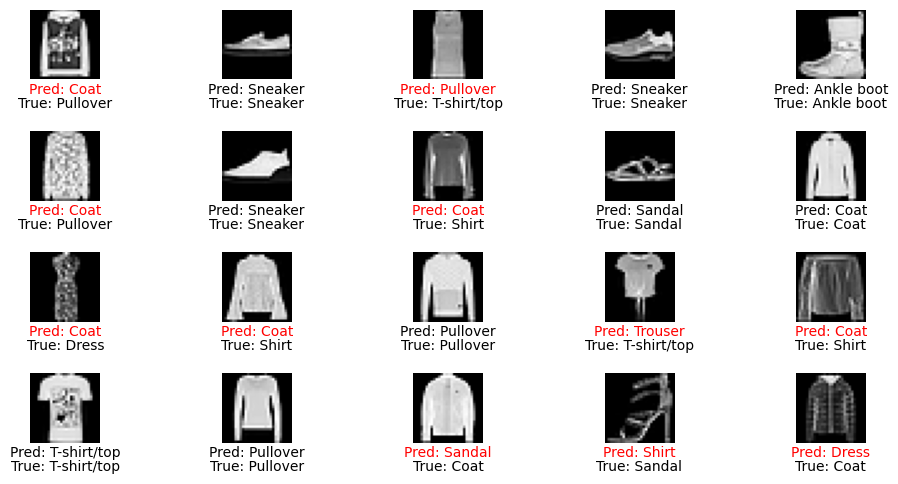

In [7]:
# Visualizing predictions with labels
# Initialize a new figure for plotting, with a specified size of 10 inches wide and 5 inches tall.
plt.figure(figsize=(10, 5))

# This loop runs 20 times (for the first 20 test images).
for i in range(20):
    # Set up a grid of 4 rows and 5 columns to arrange the images.
    plt.subplot(4, 5, i + 1)

    # display the i-th image from the test set. The image is reshaped from a flat array back into its original 28x28 pixel format, and it uses a grayscale color map.
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')

    # Get the predicted and true labels
    # pred_label retrieves the predicted label from y_pred_classes using the index i.
    pred_label = label_names[y_pred_classes[i]]

    # Use .iloc for integer-based indexing in Pandas Series
    # true_label retrieves the actual label from y_test using the same index. The iloc function is used for accessing elements by their integer index
    true_label = label_names[y_test.iloc[i]]

    # Set the title to show label names
    # Check if the prediction is correct and set color accordingly
    # Checks if the predicted label matches the true label.
    # If they don't match, display the predicted label in red below the image, indicating an incorrect prediction.
    # If they do match, display the predicted label in black.
    if y_pred_classes[i] != y_test.iloc[i]:
        plt.text(0.5, -0.2, f"Pred: {pred_label}", color='red', ha='center', fontsize=10, transform=plt.gca().transAxes)
    else:
        plt.text(0.5, -0.2, f"Pred: {pred_label}", color='black', ha='center', fontsize=10, transform=plt.gca().transAxes)

    # Always display the true label in black
    # displays the true label in black below the predicted label, providing a reference for comparison.
    plt.text(0.5, -0.4, f"True: {true_label}", color='black', ha='center', fontsize=10, transform=plt.gca().transAxes)

    # Remove the axis ticks and labels for a cleaner visualization of the images.
    plt.axis('off')

# adjust the spacing between subplots to avoid overlap.
plt.tight_layout()

# Display the figure
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
confusion_mtrx = confusion_matrix(y_true=y_test, y_pred=y_pred_classes)

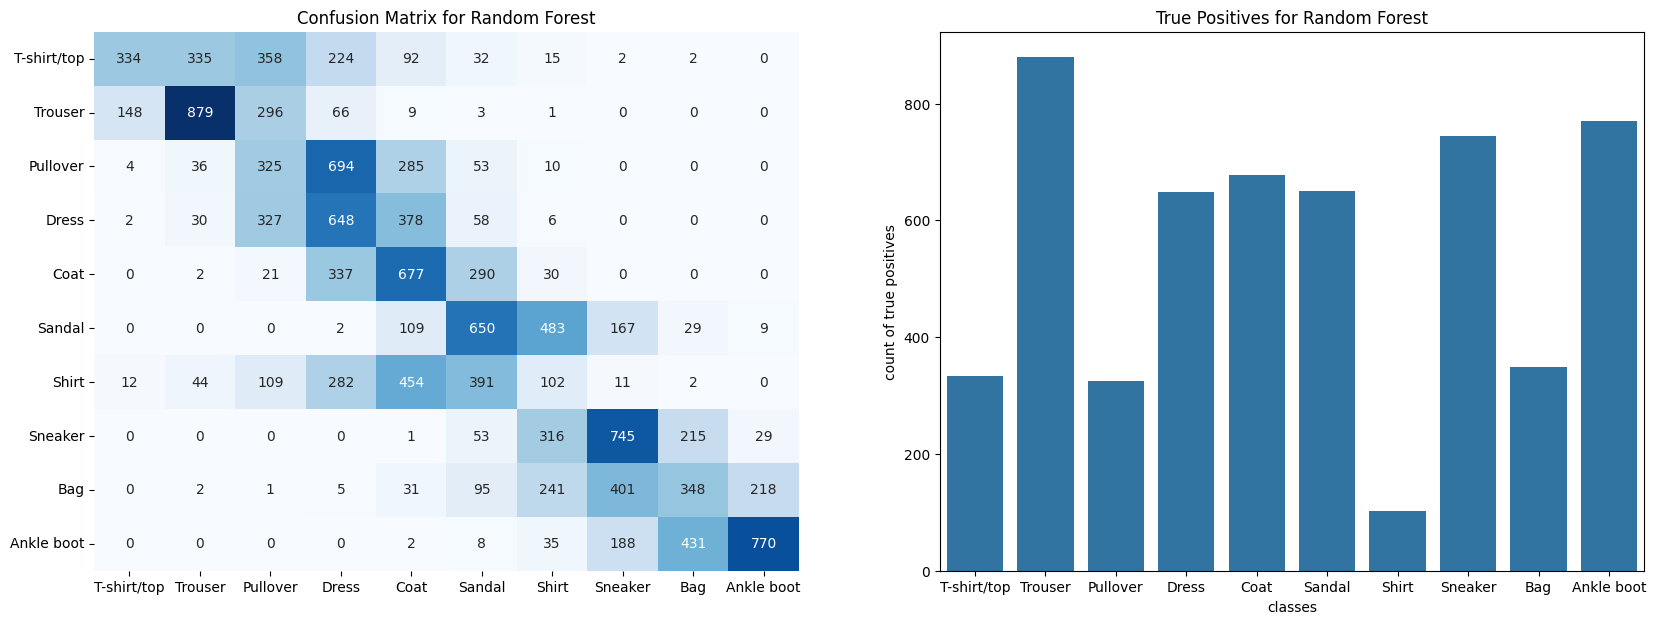

In [11]:
classes = {
  0:	'T-shirt/top',
  1:	'Trouser',
  2:	'Pullover',
  3:	'Dress',
  4:	'Coat',
  5:	'Sandal',
  6:	'Shirt',
  7:	'Sneaker',
  8:	'Bag',
  9:	'Ankle boot',
  }
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.heatmap(confusion_mtrx,xticklabels=[value for value in classes.values()], yticklabels=[value for value in classes.values()],annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.subplot(1,2,2)
sns.barplot(x=[value for value in classes.values()], y=np.diag(confusion_mtrx))
plt.title('True Positives for Random Forest')
plt.ylabel('count of true positives')
plt.xlabel('classes')
plt.show()

In [13]:
import pandas as pd

In [14]:
conf_matrix = pd.DataFrame(confusion_mtrx)
conf_matrix.columns = [value for value in classes.values()]
conf_matrix.to_csv('CM_LR.csv')